In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from quenched_galaxies.definitions import data, colors

/home/aemerick/code/quenched_galaxies/definitions.py:284: RuntimeWarning: divide by zero encountered in log10
  data['SCSAM']['log_SFR_20Myr']   = _np.log10(data['SCSAM']['SFR_20Myr'])
/home/aemerick/code/quenched_galaxies/definitions.py:285: RuntimeWarning: divide by zero encountered in log10
  data['SCSAM']['log_SFR_100Myr']  = _np.log10(data['SCSAM']['SFR_100Myr'])
/home/aemerick/code/quenched_galaxies/definitions.py:286: RuntimeWarning: divide by zero encountered in log10
  data['SCSAM']['log_SFR_1Gyr']    = _np.log10(data['SCSAM']['SFR_1Gyr'])
/home/aemerick/code/quenched_galaxies/definitions.py:335: RuntimeWarning: divide by zero encountered in log10
  data['Brooks']['log_' + k] = _np.log10(data['Brooks'][k])
/home/aemerick/code/quenched_galaxies/definitions.py:344: RuntimeWarning: divide by zero encountered in log10
  data['Illustris']['log_SFR_' + k] = _np.log10(data['Illustris']['SFR_' + k])
/home/aemerick/code/quenched_galaxies/definitions.py:394: RuntimeWarning: divide by ze

CAUTION: HI Approximation on - For data with no explicit HI mass, HI mass is taken as the cold gas mass times the constant factor  0.735


In [2]:
def HI_mass_function(mhi_bins = np.arange(7.0, 11.0, 0.2), datasets = None):

    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    
    for dname in datasets:

        MHI     = data[dname]['log_MHI']
        Mstar   = data[dname]['log_Mstar']
        MHI[ MHI == -np.inf ] = -99
        
        select = Mstar > 9.0
        
        MHI = MHI[ select ]
        
        volume  = data[dname]['volume']
        
        hist, bins = np.histogram( MHI, bins = mhi_bins)
        hist = np.log10(hist / (bins[1:] - bins[:-1]) / volume)
        
        xcent = (mhi_bins[1:] + mhi_bins[:-1])*0.5
        ax.plot(xcent, hist, lw = 3.0, color = colors[dname], ls = '-', label = dname)
        
    ax.legend(loc='lower left')
    ax.set_ylabel(r'log($\Phi_{\rm HI}$) [Mpc$^{-3}$ dex$^{-1}$]')
    ax.set_xlabel(r'log(M$_{\rm HI}$)')
    ax.set_xlim(mhi_bins[0],mhi_bins[-1])
    ax.set_ylim(-5.0, -1.0)
    plt.minorticks_on()
    

    fig.savefig("HI_mass_function_centrals_and_sat.png")
    
    return 

/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


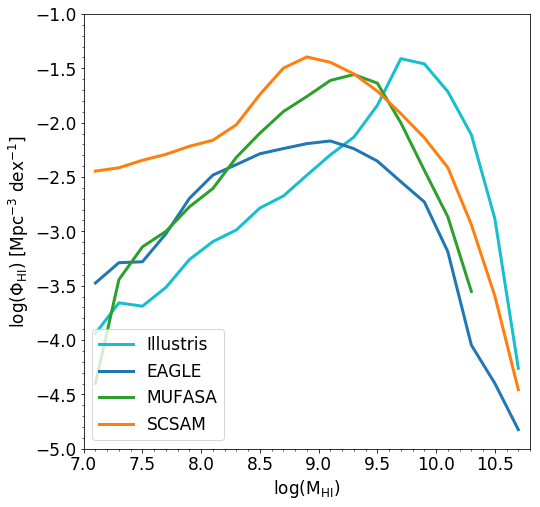

In [3]:
datasets = ['Illustris','EAGLE','MUFASA','SCSAM']
HI_mass_function(datasets = datasets)